### 1. Import bibliotek

In [4]:
import os
import pandas as pd

from keras.models import Sequential 
from keras.layers import Dense

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression

import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
from google.colab import drive
drive.mount('/content/drive')
os.chdir('/content/drive/My Drive/')

# Z tego fragmentu kodu korzystamy tylko przy pracy w Google Colab

Mounted at /content/drive


### 2. Przygotowanie danych do analizy

In [10]:
os.getcwd()

'/content/drive/My Drive'

In [11]:
base_data = pd.read_csv("StudentsPerformance.csv")
base_data.columns

cols = ["reading score", "gender", "race/ethnicity", "parental level of education", "lunch", "test preparation course"]
data = base_data[cols].copy()

In [12]:
data.isnull().any()

reading score                  False
gender                         False
race/ethnicity                 False
parental level of education    False
lunch                          False
test preparation course        False
dtype: bool

In [13]:
encoder = LabelEncoder()
data.loc[:,"gender"] = encoder.fit_transform(data.loc[:,"gender"])
data.loc[:,"race/ethnicity"] = encoder.fit_transform(data.loc[:,"race/ethnicity"])
data.loc[:,"parental level of education"] = encoder.fit_transform(data.loc[:,"parental level of education"])
data.loc[:,"lunch"] = encoder.fit_transform(data.loc[:,"lunch"])
data.loc[:,"test preparation course"] = encoder.fit_transform(data.loc[:,"test preparation course"])

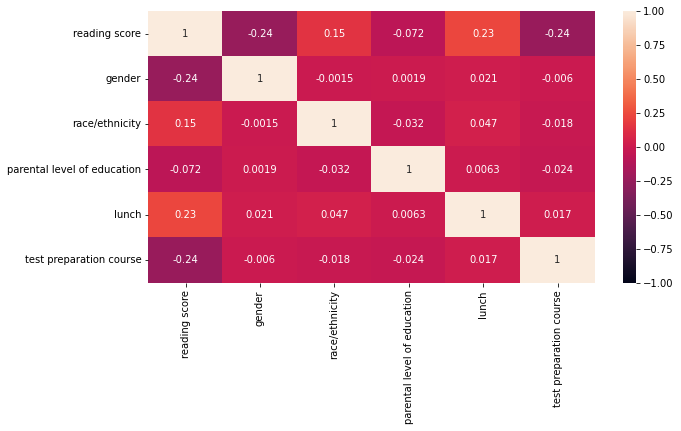

In [19]:
plt.figure(figsize=(10, 5)) 
heatmap = sns.heatmap(data.corr(), vmin=-1, vmax=1, annot=True) 

### 3. Trenowanie modelu

In [14]:
print(data)

     reading score  gender  ...  lunch  test preparation course
0               72       0  ...      1                        1
1               90       0  ...      1                        0
2               95       0  ...      1                        1
3               57       1  ...      0                        1
4               78       1  ...      1                        1
..             ...     ...  ...    ...                      ...
995             99       0  ...      1                        0
996             55       1  ...      0                        1
997             71       0  ...      0                        0
998             78       0  ...      1                        0
999             86       0  ...      0                        1

[1000 rows x 6 columns]


In [20]:
y = data.iloc[:,0]
x = data.iloc[:,1:6]
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

In [21]:
lr = LinearRegression()
lr.fit(X_train, y_train)

mean_squared_error(y_test, lr.predict(X_test))
mean_absolute_error(y_test, lr.predict(X_test))

10.781087132946848

In [22]:
xgbr = XGBRegressor(max_depth = 6)
xgbr.fit(X_train,y_train)

mean_squared_error(y_test, xgbr.predict(X_test))
mean_absolute_error(y_test, xgbr.predict(X_test))

[19:44:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


12.231686798095703